In [10]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
print(os.listdir("input"))

['.DS_Store', 'test.csv', 'trains.csv', 'tests.csv', 'train.csv', '.ipynb_checkpoints', 'archive.zip']


In [11]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.model_selection import validation_curve, KFold, cross_val_score, GridSearchCV
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold


In [12]:
train_data = pd.read_csv("input/trains.csv") #reading the csv files using pandas
test_data = pd.read_csv("input/tests.csv")

Text(0.5, 1.0, 'Digit 1')

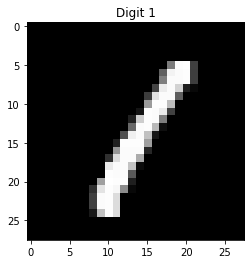

In [27]:
# Plotting some samples as well as converting into matrix

four = train_data.iloc[3, 1:]
four.shape
four = four.values.reshape(28,28)
plt.imshow(four, cmap='gray')
plt.title("Digit 1")

/Users/lihui/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
Name: label, dtype: int64

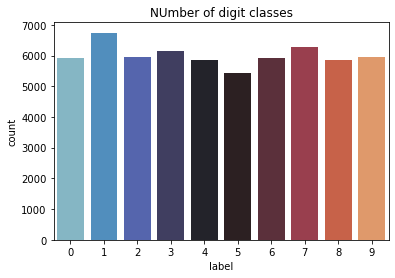

In [14]:
## Visualizing the number of class and counts in the datasets
plt.plot(figure = (16,10))
g = sns.countplot( train_data["label"], palette = 'icefire')
plt.title('NUmber of digit classes')
train_data.label.astype('category').value_counts()

In [15]:
## Separating the X and Y variable

y = train_data['label']

## Dropping the variable 'label' from X variable 
X = train_data.drop(columns = 'label')

## Printing the size of data 
print(train_data.shape)

(60000, 785)


In [16]:
## Normalization

X = X/255.0
test_data = test_data/255.0

print("X:", X.shape)
print("test_data:", test_data.shape)

X: (60000, 784)
test_data: (10000, 785)


In [17]:
# scaling the features
from sklearn.preprocessing import scale
X_scaled = scale(X)

# train test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3, train_size = 0.2 ,random_state = 10)

In [18]:
# linear model

model_linear = SVC(kernel='linear')
model_linear.fit(X_train, y_train)

# predict
y_pred = model_linear.predict(X_test)

In [19]:
# confusion matrix and accuracy

from sklearn import metrics
from sklearn.metrics import confusion_matrix
# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# cm
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

accuracy: 0.9103333333333333 

[[1719    0   10    5    3   16   12    1    6    0]
 [   1 1951   11    5    5    4    0    3   11    1]
 [  11   26 1676   30   23    5   23   19   17    1]
 [  10    4   47 1627    4   66    5   19   42   10]
 [   4    8   21    1 1658    5   14    6    5   50]
 [  21    9   19   87   12 1423   30    1   39   11]
 [  20    7   23    1   14   20 1666    2    4    0]
 [   7   13   19   16   31    4    2 1774    5   93]
 [  25   44   49   54   12   58   18   11 1436   17]
 [   4   11   19   23   90    9    1   69   20 1456]]


In [20]:
# non-linear model
# using rbf kernel, C=1, default value of gamma

# model
non_linear_model = SVC(kernel='rbf')

# fit
non_linear_model.fit(X_train, y_train)

# predict
y_pred = non_linear_model.predict(X_test)

In [21]:
# confusion matrix and accuracy

# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# cm
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

accuracy: 0.943 

[[1722    0   15    4    1    6   13    2    8    1]
 [   1 1947   21    7    5    0    1    2    7    1]
 [   5    6 1747   11   12    3   14   16   14    3]
 [   2    3   52 1685    1   37    2   21   26    5]
 [   1    5   31    1 1664    5    9    7    4   45]
 [   3    5   28   33    3 1526   27    5   15    7]
 [   8    4   21    0    4   14 1698    1    7    0]
 [   3   11   52    7   14    0    0 1828    2   47]
 [  10   22   32   18    9   26   11    5 1585    6]
 [   3    5   25   17   23    4    0   38   15 1572]]


In [22]:

# creating a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 10)

# specify range of hyperparameters
# Set the parameters by cross-validation
hyper_params = [ {'gamma': [1e-2, 1e-3, 1e-4],
                     'C': [5,10]}]


# specify model
model = SVC(kernel="rbf")

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=10, shuffle=True),
             estimator=SVC(),
             param_grid=[{'C': [5, 10], 'gamma': [0.01, 0.001, 0.0001]}],
             return_train_score=True, scoring='accuracy', verbose=1)

In [23]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,51.759413,2.192987,11.529590,0.219934,5,0.01,"{'C': 5, 'gamma': 0.01}",0.789583,0.764167,0.795000,...,0.776083,0.013567,5,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
1,9.719326,0.634949,5.468231,0.170588,5,0.001,"{'C': 5, 'gamma': 0.001}",0.947083,0.959583,0.953333,...,0.950000,0.005780,1,0.994896,0.993750,0.995208,0.995417,0.995208,0.994896,0.000597
2,10.451411,0.149972,6.158145,0.100892,5,0.0001,"{'C': 5, 'gamma': 0.0001}",0.926250,0.937083,0.935000,...,0.931167,0.004643,4,0.952500,0.948958,0.950521,0.952083,0.949688,0.950750,0.001359
3,53.985037,5.023311,11.735703,0.346265,10,0.01,"{'C': 10, 'gamma': 0.01}",0.789583,0.764167,0.795000,...,0.776083,0.013567,5,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
4,9.605322,0.075540,5.366734,0.043947,10,0.001,"{'C': 10, 'gamma': 0.001}",0.947500,0.959583,0.952083,...,0.949667,0.005691,2,0.999167,0.998750,0.998854,0.998542,0.998854,0.998833,0.000202
5,7.875610,0.880433,5.000757,0.033897,10,0.0001,"{'C': 10, 'gamma': 0.0001}",0.931667,0.944167,0.937500,...,0.935500,0.005782,3,0.961250,0.957500,0.959688,0.960729,0.960104,0.959854,0.001292


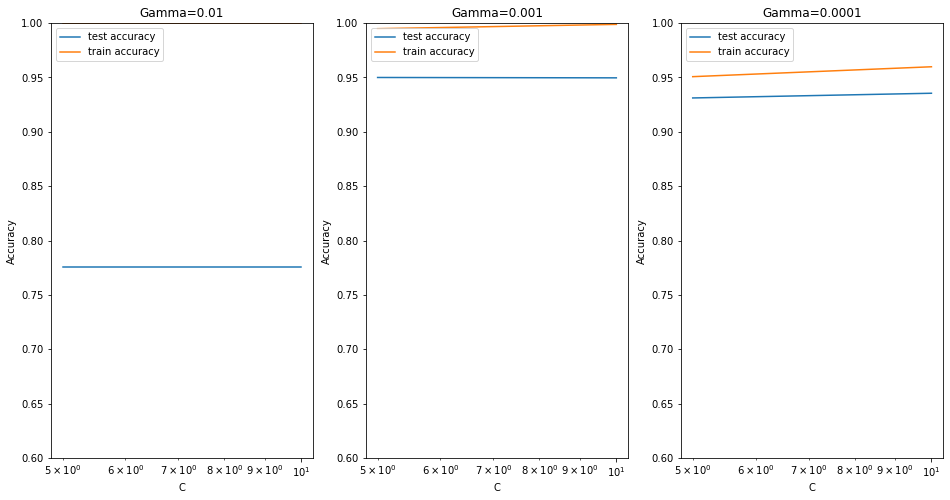

In [24]:
# converting C to numeric type for plotting on x-axis
cv_results['param_C'] = cv_results['param_C'].astype('int')

# # plotting
plt.figure(figsize=(16,8))

# subplot 1/3
plt.subplot(131)
gamma_01 = cv_results[cv_results['param_gamma']==0.01]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

# subplot 2/3
plt.subplot(132)
gamma_001 = cv_results[cv_results['param_gamma']==0.001]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


# subplot 3/3
plt.subplot(133)
gamma_0001 = cv_results[cv_results['param_gamma']==0.0001]

plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.0001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

In [25]:
# printing the optimal accuracy score and hyperparameters
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.95 corresponding to hyperparameters {'C': 5, 'gamma': 0.001}


In [26]:
# model with optimal hyperparameters

# model
model = SVC(C=10, gamma=0.001, kernel="rbf")

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# metrics
print("accuracy", metrics.accuracy_score(y_test, y_pred), "\n")
print(metrics.confusion_matrix(y_test, y_pred), "\n")

accuracy 0.9527222222222222 

[[1731    0   14    1    0    6   13    2    4    1]
 [   1 1960   18    3    3    0    0    1    3    3]
 [   6    6 1762   11   13    2   10   17    3    1]
 [   2    1   44 1706    4   27    1   12   28    9]
 [   1    5   20    0 1685    3    9    7    3   39]
 [   4    4   23   26    3 1549   20    2   12    9]
 [   7    6   16    0    5    8 1709    1    5    0]
 [   3   14   38    6   14    0    1 1858    3   27]
 [  14   16   29   14   11   19   11    8 1594    8]
 [   2    5   14   12   26    4    0   32   12 1595]] 



In [28]:
# model with optimal hyperparameters

# model
model = SVC(C=15, gamma=0.001, kernel="rbf")

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# metrics
print("accuracy", metrics.accuracy_score(y_test, y_pred), "\n")
print(metrics.confusion_matrix(y_test, y_pred), "\n")

accuracy 0.9527222222222222 

[[1732    0   13    1    0    7   13    2    3    1]
 [   1 1960   17    4    3    0    0    2    4    1]
 [   6    6 1762   12   13    2   10   16    3    1]
 [   2    1   43 1706    4   26    1   14   28    9]
 [   1    5   20    0 1682    3   10    9    3   39]
 [   4    5   23   26    3 1546   20    2   13   10]
 [   7    5   16    0    5    8 1709    1    6    0]
 [   3   12   36    7   13    0    1 1856    5   31]
 [  14   14   30   15   11   17   12    8 1595    8]
 [   2    5   15   12   26    4    0   27   10 1601]] 

